In [14]:
from env import *
from fonctions import *
import numpy as np
import gurobipy as gp
from gurobipy import GRB

### Test generator

In [34]:
env = Env(10,15,0.6,0.2,[0.1,0.2,0.3,0.4])

In [35]:
cases=env.reset()

In [26]:
cases[:,:,0]

array([[4, 4, 4, 4, 2, 0, 0, 0, 0, 0, 3, 2, 0, 4, 3],
       [2, 2, 4, 4, 4, 2, 1, 4, 4, 3, 4, 0, 3, 3, 4],
       [3, 2, 1, 0, 4, 0, 4, 3, 3, 4, 3, 3, 4, 1, 0],
       [2, 0, 4, 3, 3, 1, 2, 4, 0, 4, 4, 2, 3, 3, 2],
       [3, 4, 3, 4, 3, 0, 4, 4, 4, 0, 0, 4, 3, 1, 4],
       [3, 1, 0, 0, 3, 1, 1, 4, 4, 3, 3, 0, 3, 3, 3],
       [4, 4, 4, 0, 0, 4, 0, 0, 3, 0, 0, 4, 3, 4, 1],
       [4, 4, 3, 0, 2, 3, 4, 2, 3, 4, 0, 3, 3, 3, 4],
       [3, 0, 4, 0, 3, 4, 3, 2, 4, 3, 2, 4, 4, 4, 3],
       [4, 4, 4, 3, 4, 1, 1, 3, 0, 0, 0, 3, 1, 1, 1]])

In [18]:
env.reward

array([[  -4,   -2,    0,   -4,   -2,   -2,   -4,   -3,   -4,   -4],
       [  -3,   -4,   -1,   -2,   -2,   -4,   -4,    0,    0,   -2],
       [  -4,    0,   -3,   -4,   -4,   -4,   -4,   -4,   -3,   -3],
       [  -3,   -2,   -2,   -4,   -4,    0,   -2,   -3,   -4,   -3],
       [  -3,   -3,    0,   -3,   -1,   -3,   -4,   -3,    0,    0],
       [  -4,   -3,   -4,   -1,   -1,   -3,   -1,   -3,   -1,   -3],
       [  -2,   -4,   -1,   -4,    0,    0,   -3,   -3,   -4,   -3],
       [  -4,   -3,   -3,    0,   -4,   -4,    0,    0,   -1,   -3],
       [   0,   -3,   -4,   -2,    0,   -1,   -3,    0,   -4,   -1],
       [  -3,   -2,   -3,   -1,    0,   -4,   -3,    0,   -3, 1000]])

### Test value iteration

In [8]:
nb,v,policy=value_iteration(env,0.9,max_iteration=2000)

In [9]:
dict_action={0:"O",1:"S",2:"W",3:"E"}

In [10]:
policy

array([[3., 3., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 2.],
       [0., 0., 0., 1., 1., 1., 1., 1., 2., 0.],
       [3., 3., 1., 1., 3., 1., 1., 1., 0., 0.],
       [1., 3., 1., 1., 0., 1., 1., 1., 0., 0.],
       [1., 3., 3., 3., 1., 1., 1., 2., 2., 0.],
       [3., 1., 0., 3., 3., 1., 1., 0., 0., 1.],
       [3., 3., 3., 1., 0., 3., 1., 0., 1., 1.],
       [3., 1., 0., 3., 3., 3., 3., 3., 1., 1.],
       [3., 3., 3., 0., 0., 3., 3., 3., 3., 0.]])

In [11]:
v

array([[-11.25876528,  -9.99700309,  -9.99700309,   0.        ,
          0.        , 249.2113874 , 256.09771574, 249.10127409,
        230.36593737, 210.80542028],
       [-11.90547187, -11.45123748,   0.        , 241.1175984 ,
        261.88749919, 283.77628092, 291.2913658 , 281.78137576,
        261.70491852, 230.69240965],
       [  0.        ,   0.        ,   0.        , 263.22283836,
        293.31752658, 322.86624405, 330.17419083, 322.67432683,
        286.14380512,   0.        ],
       [220.80634536, 244.9329388 , 268.91666926, 294.20585307,
        328.59265129, 369.55800738, 373.10134907, 359.88344999,
          0.        ,   0.        ],
       [239.97946794, 269.19238569, 300.62742742, 337.35127241,
          0.        , 411.75224096, 427.20218828, 394.98202236,
          0.        , -29.99100928],
       [265.18356349, 294.70723462, 335.82541345, 380.19112177,
        416.66384571, 464.83565678, 495.23052264, 441.70715466,
        387.32591538,   0.        ],
       [29

### Test visualisation de politique

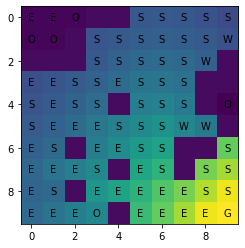

In [12]:
visu_policy(v,policy,dict_action,cases)

### Test programmation lineaire de politique mixte

In [36]:
p=dual_pl_mono(env,0.9)

In [38]:
pn=normalise(p)

In [39]:
print(pn)

[[[1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]]

 [[1. 0. 0. 0.]
  [0. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]]

 [[1. 0. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]


In [15]:
pd=get_a_policy(pn)

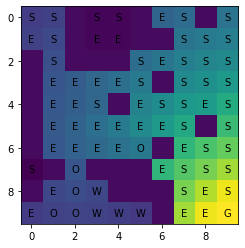

In [16]:
visu_policy(v,pd,dict_action,cases)